<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002
diff = np.float32(12.123452) - np.float32(12.123450)
error = abs(diff-valor_real)/valor_real*100 #el error es mas gra

(12.123452/valor_real)*1/(2**31)
error

1.9073486e-06


4.632568359374996

In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

i. Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


ii. Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

iii. Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

iv. See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

v. By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

vi. Make a series of graphs of the error versus N for different values of x.

In [ ]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [ ]:
#Serie alternante
# i)
def exponencial(x,n):
  exp = 0
  for i in range(n):
    exp += ((-1)**i) * (x**i)/(factorial(i))
  return exp

x = 0.1
n = 100
e1 = exponencial(x,n)
e_exacto = np.exp(-x)

print(f'{e1}')
print(f'{e_exacto}')

0.9048374180359596
0.9048374180359595


In [ ]:
#Serie truncada, determina el numero de iteraciones para llegar al numero de presicion de la serie
# ii)
def exp_truncado(x,n):
  ep = exponencial(x,n)
  lim = 1e-7*ep
  ex = 0
  for i in range(n):
    ex = abs((-x)**(i+1) / factorial(i+1))
    if ex <= lim:
      break
  exp = exponencial(x,i)
  return exp, i

exacto = np.exp(-x)
x = 0.1
n = 100
print(f'Valor de la serie:{exponencial(x,n)}')
print(f'Valor de la serie truncada:{exp_truncado(x,n)}')
print(f'Valor exacto:{exacto}')


Valor de la serie:0.9048374180359596
Valor de la serie truncada:(0.9048333333333334, 4)
Valor exacto:0.9048374180359595


In [ ]:
#iii)
exacto = np.exp(-8)
print(f'Valor de la serie:{exponencial(8,n)}')
print(f'Valor de la serie truncada:{exp_truncado(8,n)}')
print(f'Valor exacto:{exacto}')

Valor de la serie:0.00033546262785295135
Valor de la serie truncada:(0.00033546259492638574, 38)
Valor exacto:0.00033546262790251185


In [ ]:
def invertida(x,n):
  exp = 0
  for i in range(n):
    exp += x**i/factorial(i)
  return 1/exp

exacto = np.exp(-x)
x = 10
n = 100
print(f'Valor de la serie:{exponencial(x,n)}')
print(f'Valor de la serie truncada:{invertida(x,n)}')
print(f'Valor exacto:{exacto}')

Valor de la serie:4.5399929433607724e-05
Valor de la serie truncada:4.539992976248486e-05
Valor exacto:0.9048374180359595


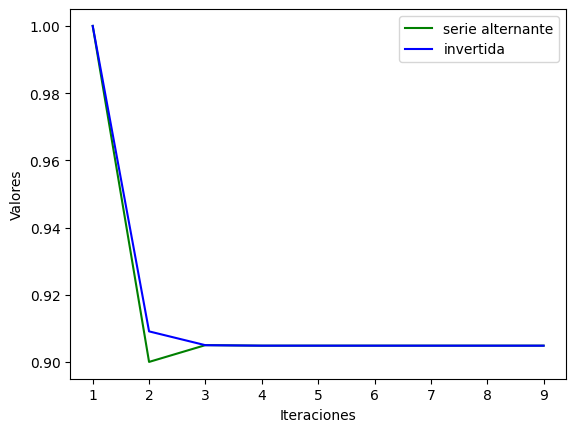

In [ ]:
x = 0.1
N = np.arange(1,10)

exp1 = np.zeros(len(N))
exp2 = np.zeros(len(N))

for i,n in enumerate(N):
  exp1[i] = exponencial(x,n)
  exp2[i] = invertida(x,n)

plt.figure()
plt.plot(N,exp1,'g-',label='serie alternante')
plt.plot(N,exp2,'b-',label='invertida')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Valores')
plt.show()

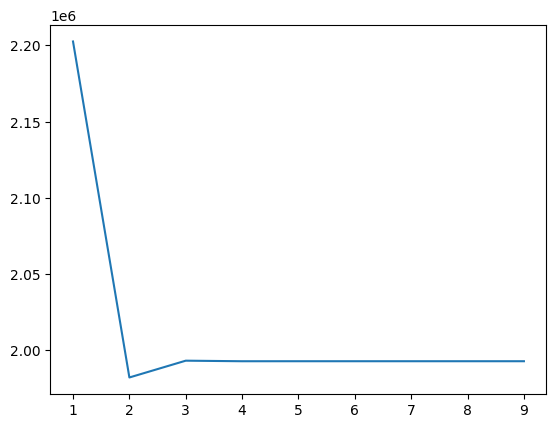

In [ ]:
x = 10
N = np.arange(1,10,1)
exact = np.exp(-x)
error = abs(exp1-exact)/exact*100
plt.plot(N,error)

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
N = 1*10^6
#SN1
def serie1(N):
  sum1 = 0
  serie1_value = []
  for n in range(1,2*N+1):
    sum1 += ((-1)**n)*(n/(n+1))
    serie1_value.append(sum1)
  return sum1

#SN2
def serie2(N):
  sum_ = 0
  sum2 = 0
  serie2_value = []
  for n in range(1,N+1):
    sum_ += (2*n -1)/(2*n)
    sum2 += 2*n/(2*n + 1)
    sum_2 = -(sum_)+sum2
    serie2_value.append(sum_2)
  return sum_2

#SN3
def serie3(N):
  sum3 = 0
  serie3_value = []
  for n in range(1,N+1):
    sum3 += 1/(2*n*((2*n)+1))
    serie3_value.append(sum3)
  return sum3

serie1(N), serie2(N),serie3(N)


(0.2872525004571711, 0.2872525004571731, 0.28725250045717127)

In [ ]:
#SN1
def serie1v(N):
  sum1 = 0
  serie1_value = []
  for n in range(1,2*N+1):
    sum1 += ((-1)**n)*(n/(n+1))
    serie1_value.append(sum1)
  return serie1_value

#SN2
def serie2v(N):
  sum_ = 0
  sum2 = 0
  serie2_value = []
  for n in range(1,N+1):
    sum_ += (2*n -1)/(2*n)
    sum2 += 2*n/(2*n + 1)
    sum_2 = -(sum_)+sum2
    serie2_value.append(sum_2)
  return serie2_value

#SN3
def serie3v(N):
  sum3 = 0
  serie3_value = []
  for n in range(1,N+1):
    sum3 += 1/(2*n*((2*n)+1))
    serie3_value.append(sum3)
  return serie3_value

In [ ]:
serie_1 = serie1v(N)
serie_3 = serie3v(N)

N1 = np.linspace(1,1*10^6,12)
Error = [(abs((x-y)/y)) for x, y in zip(serie_1,serie_3)]

In [ ]:
serie_2 = serie2v(N)
serie_3 = serie3v(N)

N1 = np.linspace(1,1*10^6,12)
Error2 = [(abs((x-y)/y)) for x, y in zip(serie_2,serie_3)]

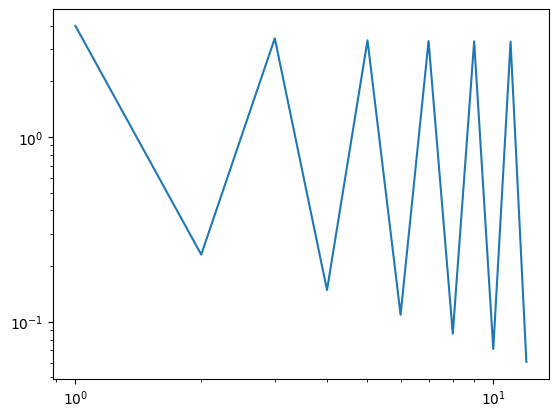

In [ ]:
plt.loglog(N1,Error)

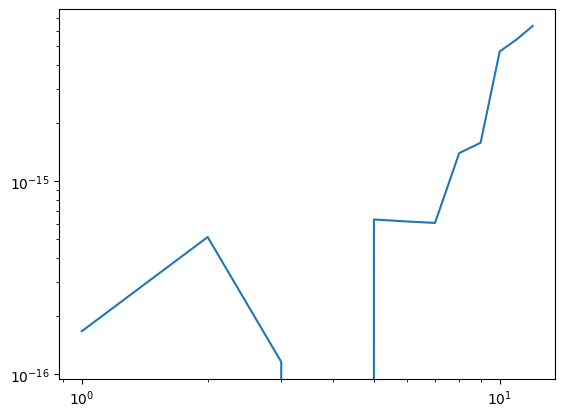

In [ ]:
plt.loglog(N1,Error2)

# Graficas

In [ ]:
def serie1(N):
  sum1 = 0
  serie1_value = []
  for n in range(1,2*N+1):
    sum1 += ((-1)**n)*(n/(n+1))
    serie1_value.append(sum1)
  return serie1_value

N_values = list(range(1, N+1))
series_values = [serie1(N)[-1] for N in N_values]

# Plotting
plt.plot(N_values, series_values, marker='o', linestyle='-')
plt.title('Sum of the series vs. Number of terms')
plt.xlabel('Number of terms (N)')
plt.ylabel('Sum of the series')
plt.grid(True)
plt.show()

In [ ]:
def serie2(N):
  sum_ = 0
  sum2 = 0
  serie2_value = []
  for n in range(1,N+1):
    sum_ += (2*n -1)/(2*n)
    sum2 += 2*n/(2*n + 1)
    sum_2 = -(sum_)+sum2
    serie2_value.append(sum_2)
  return serie2_value

N_values = list(range(1, N+1))
series2_values = [serie2(N)[-1] for N in N_values]

# Plotting
plt.plot(N_values, series2_values, marker='o', linestyle='-')
plt.title('Sum of the series vs. Number of terms')
plt.xlabel('Number of terms (N)')
plt.ylabel('Sum of the series')
plt.grid(True)
plt.show()

In [ ]:
def serie3(N):
  sum3 = 0
  serie3_value = []
  for n in range(1,N+1):
    sum3 += 1/(2*n*((2*n)+1))
    serie3_value.append(sum3)
  return serie3_value

N_values = list(range(1, N+1))
series3_values = [serie3(N)[-1] for N in N_values]

# Plotting
plt.plot(N_values, series3_values, marker='o', linestyle='-')
plt.title('Sum of the series vs. Number of terms')
plt.xlabel('Number of terms (N)')
plt.ylabel('Sum of the series')
plt.grid(True)
plt.show()